In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        

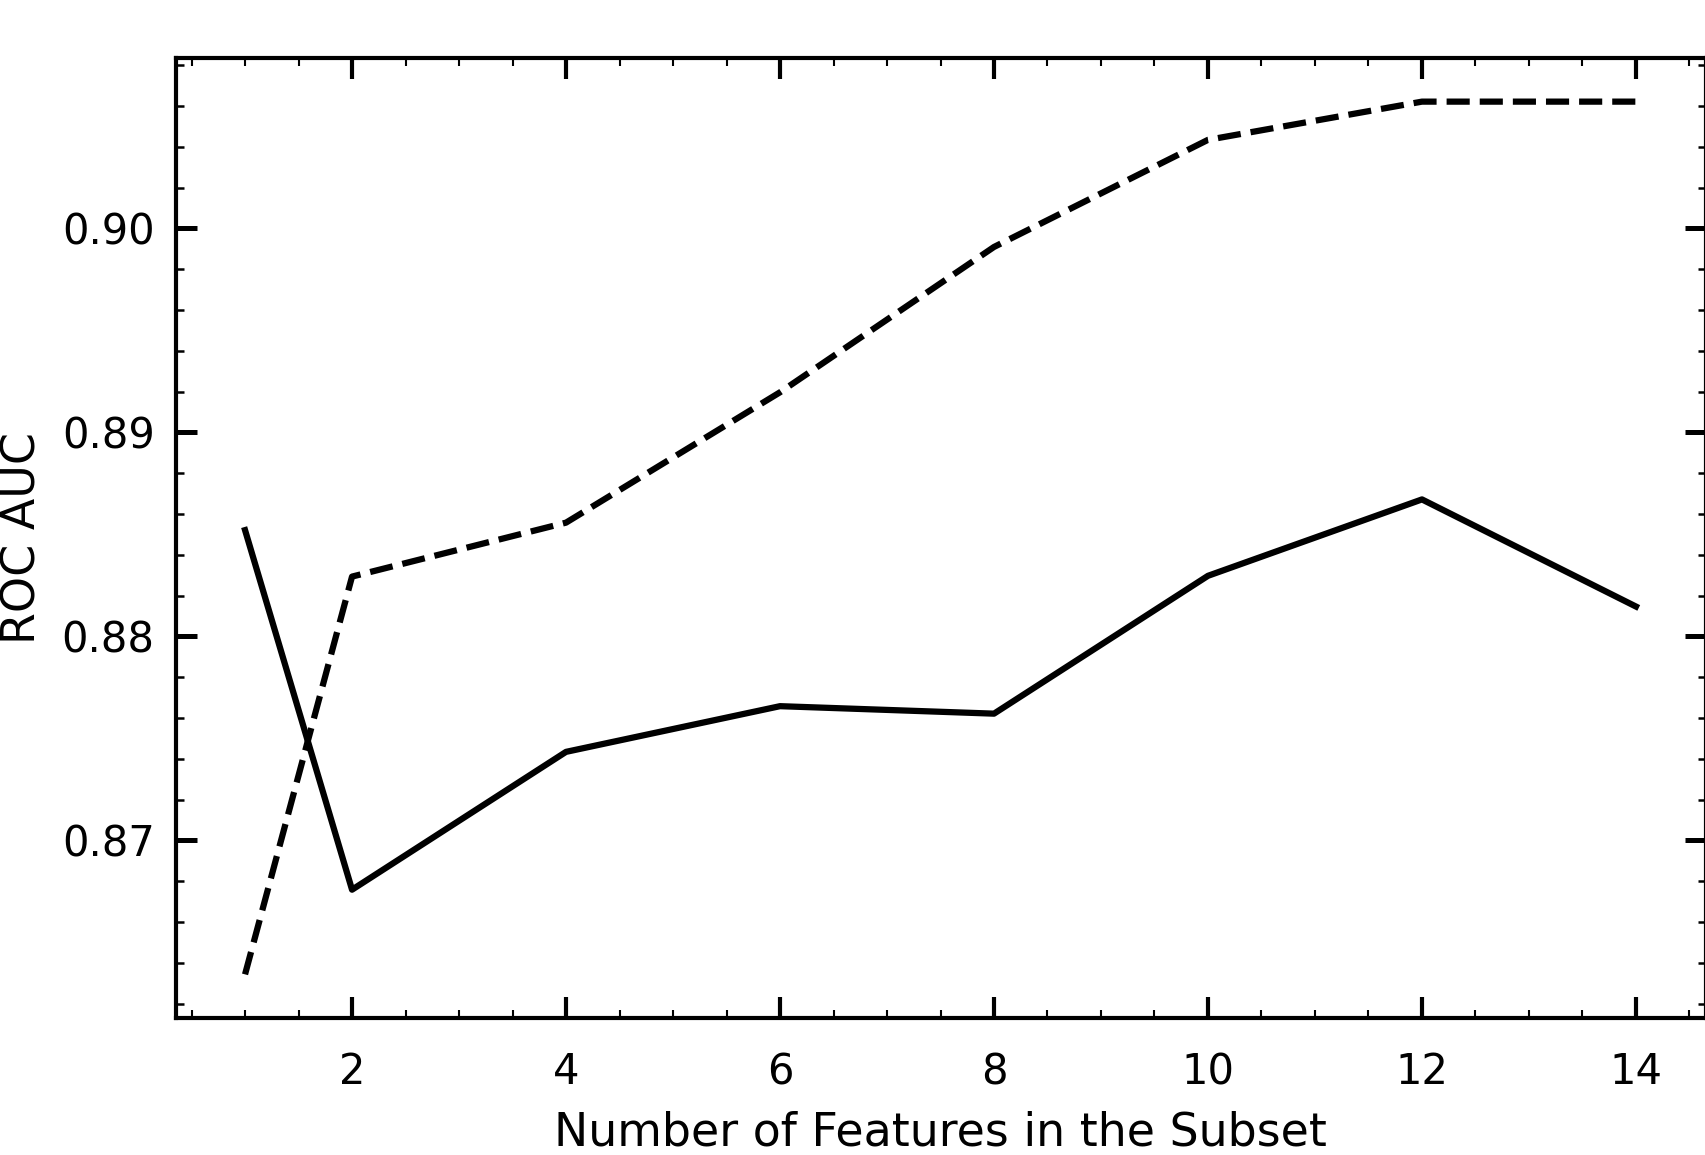

In [45]:
filter = np.zeros(8)
wrapper = np.zeros(8)

filtcsv = pd.read_csv('..\\Filter_Feature_Selection_Results\\num'+str(1)+'.csv')
filter[0] = filtcsv['ROC AUC'][0]
wrapcsv = pd.read_csv('..\\Wrapper_Feature_Selection_Results\\num'+str(1)+'.csv')
wrapper[0] = wrapcsv['ROC AUC'][0]
for i in range(1,8):
    filtresults = pd.read_csv('..\\Filter_Feature_Selection_Results\\num' + str(2*i) + '.csv')
    filter[i] = filtresults['ROC AUC'][0]
    wrapresults = pd.read_csv('..\\Wrapper_Feature_Selection_Results\\num' + str(2*i) + '.csv')    
    wrapper[i] = wrapresults['ROC AUC'][0]

xaxis = (1,2,4,6,8,10,12,14)

download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

fig, ax = plt.subplots(figsize=(6,4),dpi=300)
ax.plot(xaxis,filter,label= 'Filter Method')
ax.plot(xaxis, wrapper, color = 'black',linestyle = '--', label = 'Wrapper Method')
ax.set_xlabel('Number of Features in the Subset',fontsize=11)
ax.set_ylabel('ROC AUC',fontsize=11)
#ax.legend(fontsize=11)
plt.title(' ')
plt.show()

In [ ]:
# plot which incorporates wrapper method as well:
# 10 fold bagging implemented

filter = np.zeros(28)

for i in range(0,28):
    results = pd.read_csv('..\\Filter_Feature_Selection_Results\\accuracies for rm' + str(2*i) + '.csv')
    filter[i] = results['ROC AUC'][0]

    